In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Abrindo os datasets de cada matéria (português e matemática)

In [3]:
math = pd.read_csv('student-mat.csv')
port = pd.read_csv('student-por.csv')

In [4]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Averiguando as colunas dos datasets e abrindo uma prévia.

In [6]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
math.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


### Parte 1: Obtendo informações de desempenho em cada uma das matérias

A primeira informação que se deseja obter são as médias dos parâmetros abaixo para cada matéria

In [8]:
seriesMath = math[['G1','G2','G3','studytime','absences','failures']].mean()

In [9]:
seriesPort = port[['G1','G2','G3','studytime','absences','failures']].mean()

O dataframe "descricao" compilará uma série de informações descritivas do desempenho em cada matéria.

In [10]:
descricao = pd.DataFrame([seriesMath,seriesPort],
                        columns = ['G1','G2','G3','studytime','absences','failures'],
                         index = ['math','port'])

Deseja-se obter o percentual de alunos que pagaram aula particular de cada matéria.

Antes, porém, será necessário transformar os das da coluna "paid" que estão na forma "yes"/"no", em 1 ou 0.

In [11]:
math['paid_value'] = 2
for i in range(len(math['paid'])):
    paid = math['paid'][i]
    if paid == 'yes':
        math['paid_value'][i] = 1
    elif paid == 'no':
        math['paid_value'][i] = 0

In [12]:
port['paid_value'] = 2
for i in range(len(port['paid'])):
    paid = port['paid'][i]
    if paid == 'yes':
        port['paid_value'][i] = 1
    elif paid == 'no':
        port['paid_value'][i] = 0

In [13]:
# Obtendo o percentual de alunos que pagaram aula particular da disciplina
percentPaidM = math['paid_value'].sum()/len(math['paid_value'])
percentPaidP = port['paid_value'].sum()/len(port['paid_value'])

In [14]:
# Adicionando a informação ao dataframe "descricao"
descricao.loc['math','percent_paid'] = percentPaidM
descricao.loc['port','percent_paid'] = percentPaidP

Obtendo a informação do percentual de alunos reprovados.

Obs: será adotado como critério de reprovação, o aluno que obtiver uma nota menor que 10 na prova "G3"

In [15]:
math['passou'] = 3
for i in range(len(math['G3'])):
    notaFinal = math['G3'][i]
    if notaFinal < 10:
        math['passou'][i] = 0
    else:
        math['passou'][i] = 1

In [16]:
port['passou'] = 3
for i in range(len(port['G3'])):
    notaFinal = port['G3'][i]
    if notaFinal < 10:
        port['passou'][i] = 0
    else:
        port['passou'][i] = 1

In [17]:
# Obtendo a proporção de alunos que passaram
aprovadosMath = math['passou'].sum()/len(math['passou'])
aprovadosPort = port['passou'].sum()/len(port['passou'])

In [18]:
# Inserindo a proporção de aprovados no dataframe "descricao"
descricao.loc['math','pass_rate'] = aprovadosMath
descricao.loc['port',"pass_rate"] = aprovadosPort

Plotando os resultados

In [19]:
descricao

,G1,G2,G3,studytime,absences,failures,percent_paid,pass_rate
math,10.908861,10.713924,10.415190,2.035443,5.708861,0.334177,0.458228,0.670886
port,11.399076,11.570108,11.906009,1.930663,3.659476,0.221880,0.060092,0.845917


<bound method Figure.show of <Figure size 1080x576 with 4 Axes>>

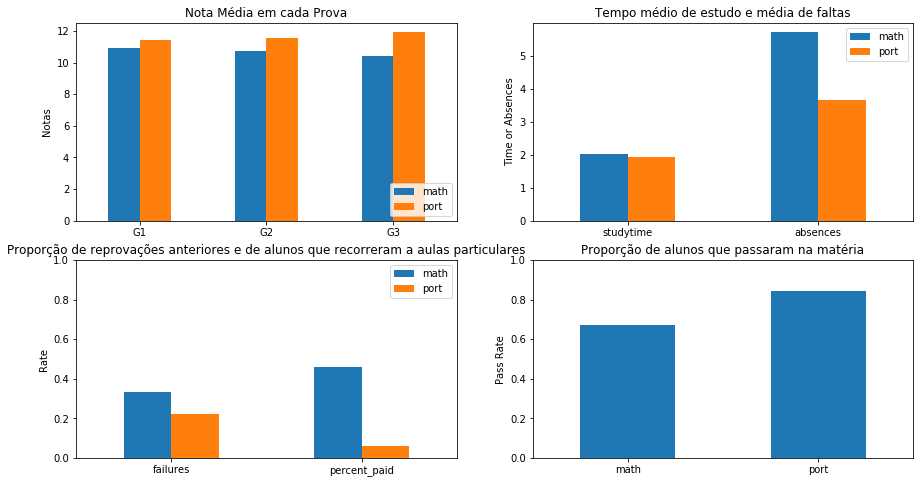

In [20]:
# Criando uma figura com 4 gráficos (dispostos numa matriz 2x2)
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# Especicando o conteúdo de cada gráfico. 
descricao[['G1','G2','G3']].transpose().plot(kind = 'bar', ax = axs[0][0])
descricao[['studytime','absences']].transpose().plot(kind = 'bar', ax = axs[0][1])
descricao[['failures','percent_paid']].transpose().plot(kind = 'bar', ax = axs[1][0])
descricao['pass_rate'].transpose().plot(kind = 'bar', ax = axs[1][1])

# Detalhando a construção de cada gráfico
    # Gráfico 1x1
axs[0][0].set_ylabel('Notas')
axs[0][0].legend(loc = 'lower right')
axs[0][0].set_title('Nota Média em cada Prova')
axs[0][0].set_xticklabels(labels = ['G1', 'G2','G3'], rotation = 0)
    # Gráfico 1x2
axs[0][1].set_ylabel('Time or Absences')
axs[0][1].set_title('Tempo médio de estudo e média de faltas')
axs[0][1].set_xticklabels(labels = ['studytime', 'absences'], rotation = 0)
    # Gráfico 2x1
axs[1][0].set_ylabel('Rate')
axs[1][0].set_xticklabels(labels = ['failures','percent_paid'], rotation = 0)
axs[1][0].set_ylim(0,1)
axs[1][0].set_title('Proporção de reprovações anteriores e de alunos que recorreram a aulas particulares')
    # Gráfico 2x2
axs[1][1].set_ylabel('Pass Rate')
axs[1][1].set_xticklabels(labels = ['math','port'], rotation = 0)
axs[1][1].set_ylim(0,1)
axs[1][1].set_title('Proporção de alunos que passaram na matéria')

fig.show

#### Distribuição das notas das três provas para cada matéria

Matemática

Text(0.5, 1.0, 'Notas nas 3 provas de matemática')

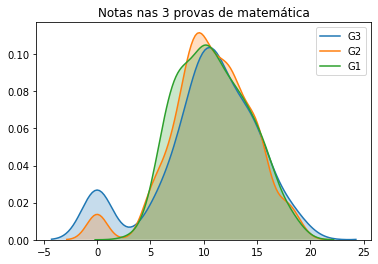

In [21]:
sns.kdeplot(data=math['G3'], shade=True)
sns.kdeplot(data=math['G2'], shade = True)
sns.kdeplot(data=math['G1'], shade = True)
plt.title('Notas nas 3 provas de matemática')

Desempenho muito similar nas três provas.

Algumas notas 0

Explorando a relação entre a prova G2 e G3

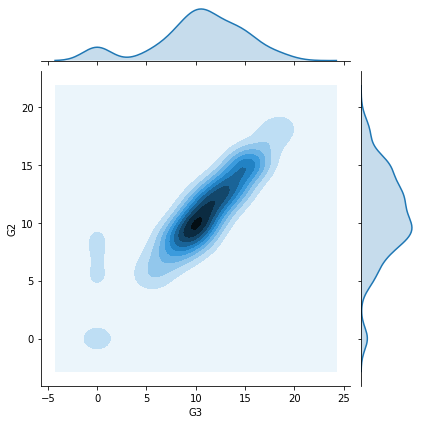

In [22]:
sns.jointplot(x = math['G3'], y = math['G2'], kind="kde")

Português

Text(0.5, 1.0, 'Notas nas 3 provas de português')

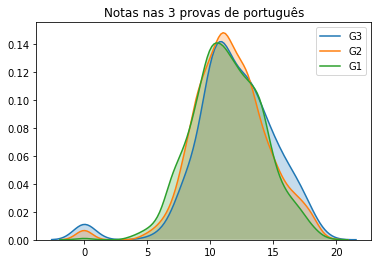

In [23]:
sns.kdeplot(data=port['G3'], shade=True)
sns.kdeplot(data=port['G2'], shade = True)
sns.kdeplot(data=port['G1'], shade = True)
plt.title('Notas nas 3 provas de português')

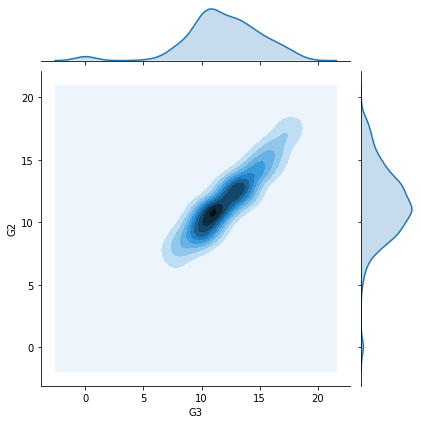

In [24]:
sns.jointplot(x = port['G3'], y = port['G2'], kind="kde")

Plotando conjuntamente o desempenho na terceira prova de matemática e português

Text(0.5, 1.0, 'Notas na terceira prova')

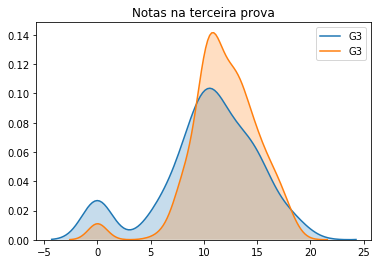

In [25]:
sns.kdeplot(data=math['G3'], shade=True)
sns.kdeplot(data=port['G3'], shade = True)
plt.title('Notas na terceira prova')

#### Visualizando o desempenho conjunto entre português e matemática

Parte 1: Unindo os datasets com resultados das provas de matemática e de português

Está explicado na documentação do dataset que para se identificar alunos comuns aos dois datasets, basta checar se todos atributos são iguais.

In [26]:
port = pd.read_csv('student-por.csv')

In [27]:
# Renomeando as colunas com notas das provas, para não haver confusão no novo dataset
math2 = math.rename(columns={'G1': 'G1_math',
                            'G2': 'G2_math',
                            'G3': 'G3_math'})
port = port.rename(columns = {'G1': 'G1_port',
                              'G2': 'G2_port',
                              'G3': 'G3_port'})
print(math.shape)
print(port.shape)

(395, 35)
(649, 33)


In [28]:
#Criando lista com atributos com dados dos alunos (que independem da matéria em questão)
atributos = ["school","sex","age","address","famsize","Pstatus",
             "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

In [29]:
#Fazendo a união baseada em todos atributos
notas = math2.merge(port, on = atributos, how = 'left')
#Simplemente remover ("drop") a linha inteira caso o valor de algum valor seja "NAN"
notas = notas.dropna()
notas = notas.reset_index()

Segundo a documentação do dataset, 382 alunos aparecem em ambos datasets

In [30]:
print(notas.shape)
notas.head()

(382, 56)


,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_port,G2_port,G3_port
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,3,GP,F,15,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,4,GP,F,16,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [31]:
notas['faixa_port'] = ' '
for i in range(len(notas)):
    notaPort = notas['G3_port'][i] 
    if notaPort <4:
        notas['faixa_port'][i] = 'notaPort < 4' 
    elif notaPort >= 4 and notaPort < 8:
        notas['faixa_port'][i] = '4 <= notaPort < 8'
    elif notaPort >= 8 and notaPort < 12:
        notas['faixa_port'][i] = '8 <= notaPort < 12'
    elif notaPort >= 12 and notaPort < 16:
        notas['faixa_port'][i] = '12 <= notaPort < 16'
    elif notaPort >=16:
        notas['faixa_port'][i] = 'notaPort >= 16'
 

In [32]:
notas['faixa_mat'] = ' '
for i in range(len(notas)):
    notaMat = notas['G3_math'][i] 
    if notaMat <4:
        notas['faixa_mat'][i] = 'notaMat < 4' 
    elif notaMat >= 4 and notaMat < 8:
        notas['faixa_mat'][i] = '4 <= notaMat < 8'
    elif notaMat >= 8 and notaMat < 12:
        notas['faixa_mat'][i] = '8 <= notaMat < 12'
    elif notaMat >= 12 and notaMat < 16:
        notas['faixa_mat'][i] = '12 <= notaMat < 16'
    elif notaMat >=16:
        notas['faixa_mat'][i] = 'notaMat >= 16'

Parte 2: Plotando as relações

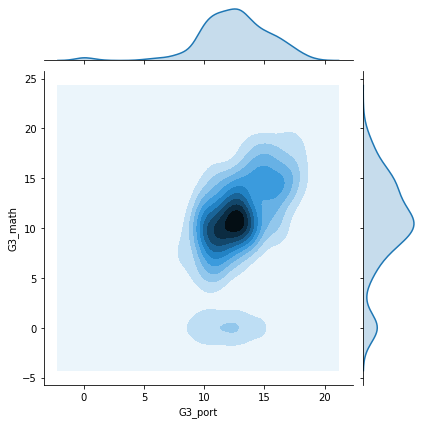

In [33]:
sns.jointplot(x = notas['G3_port'], y = notas['G3_math'], kind="kde")

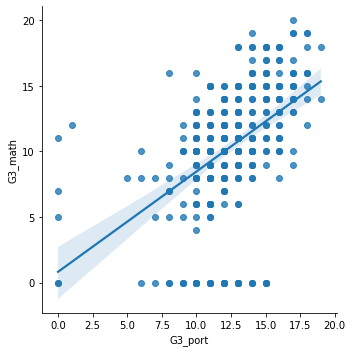

In [34]:
sns.lmplot(x="G3_port", y="G3_math", data=notas)

Notas G2 e G3 de matemática em conjunto com o resultado G3 de português

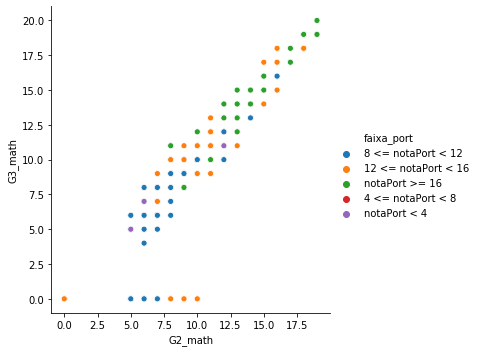

In [35]:
sns.relplot(x="G2_math", y="G3_math",hue = 'faixa_port',data=notas)

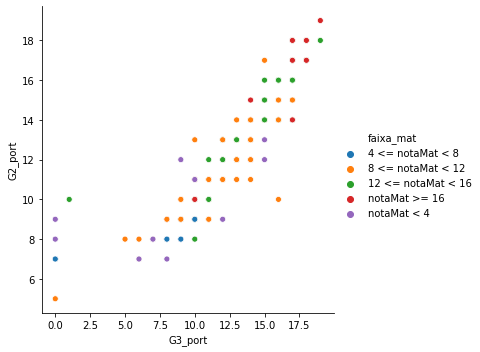

In [36]:
sns.relplot(x="G3_port", y="G2_port",hue = 'faixa_mat', data=notas)

#### Explorando a relação entre as variáveis com maior índice de "mutual information" e o target "Nota na prova 3" da prova de matemática.

Abaixo, o paramêtro "hue" permite que se destaque grupos diferentes (por exemplo, estudantes com status de relacionamento diferente). Trata-se de uma uma boa forma de notar se diferentes grupos se posicionam diferentemente nos gráficos.

O primeiro "hue" a ser usado será o sexo do aluno.

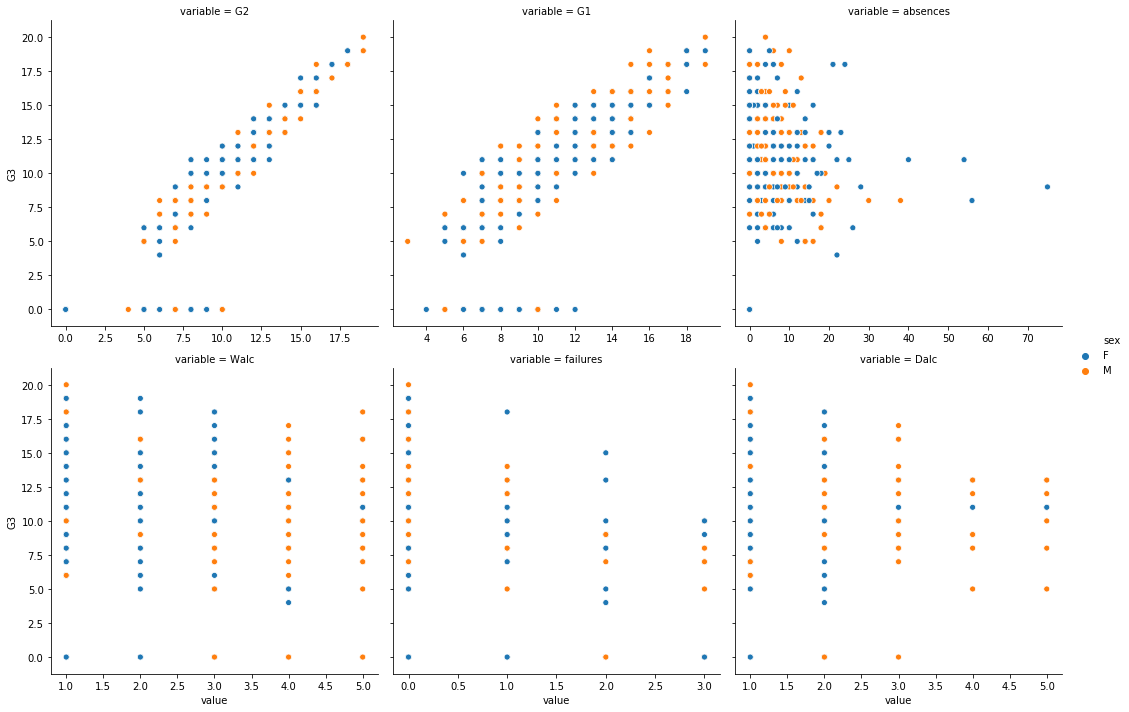

In [37]:
features = ['G2', 'G1', 'absences', 'Walc', 'failures', 'Dalc']
sns.relplot(
    x="value", y="G3", col="variable", col_wrap=3,hue = 'sex',
    data=math.melt(id_vars=["G3",'sex'], value_vars=features), facet_kws=dict(sharex=False),
)

Abaixo, será utilizado o atributo "romantic" - se o aluno(a) encontra-se em um relacionamento amoroso - como "hue".

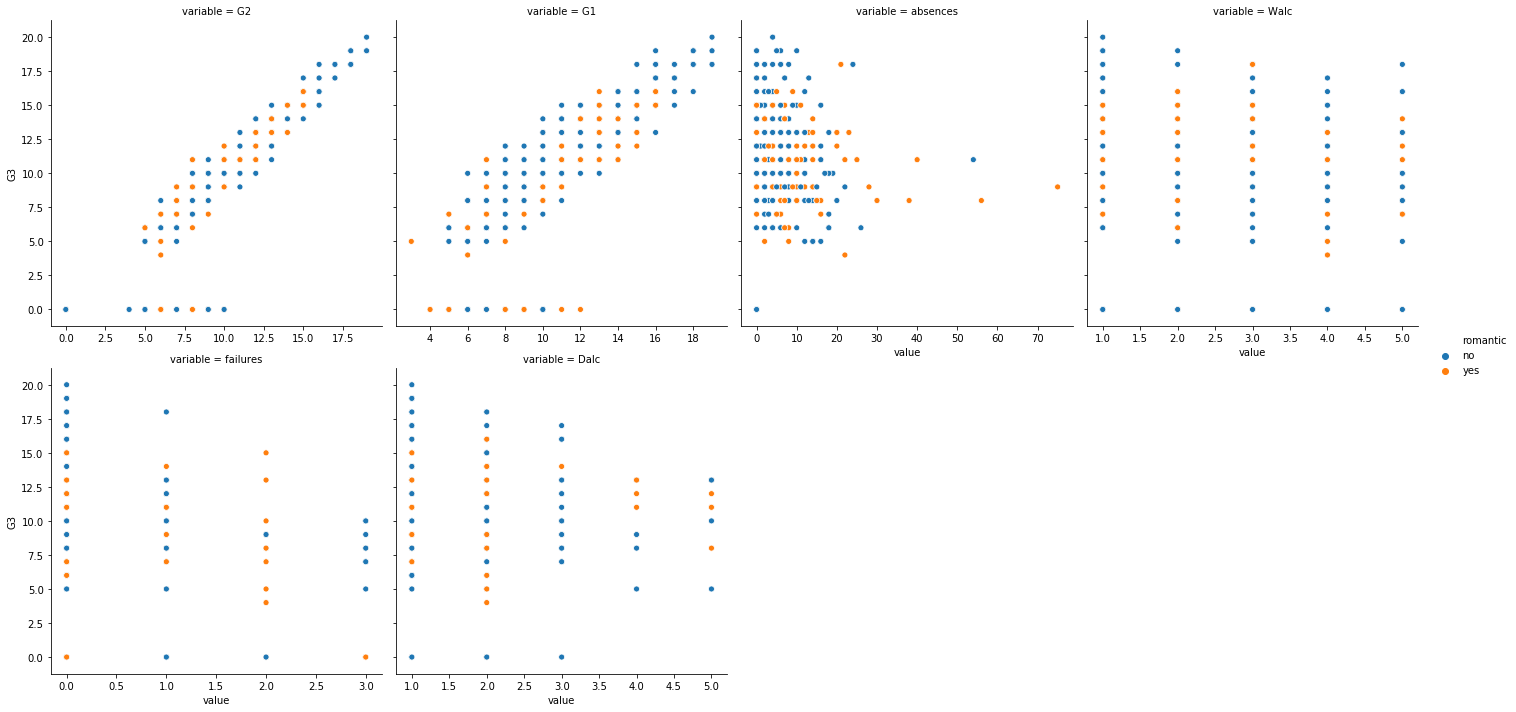

In [38]:
sns.relplot(
    x="value", y="G3", col="variable", col_wrap=4, hue = "romantic",
    data=math.melt(id_vars=["G3","romantic"], value_vars=features), facet_kws=dict(sharex=False),
);

Abaixo, será utilizado o atributo "goout" - que mede o quanto determinado aluno sái para se divertir - como "hue".

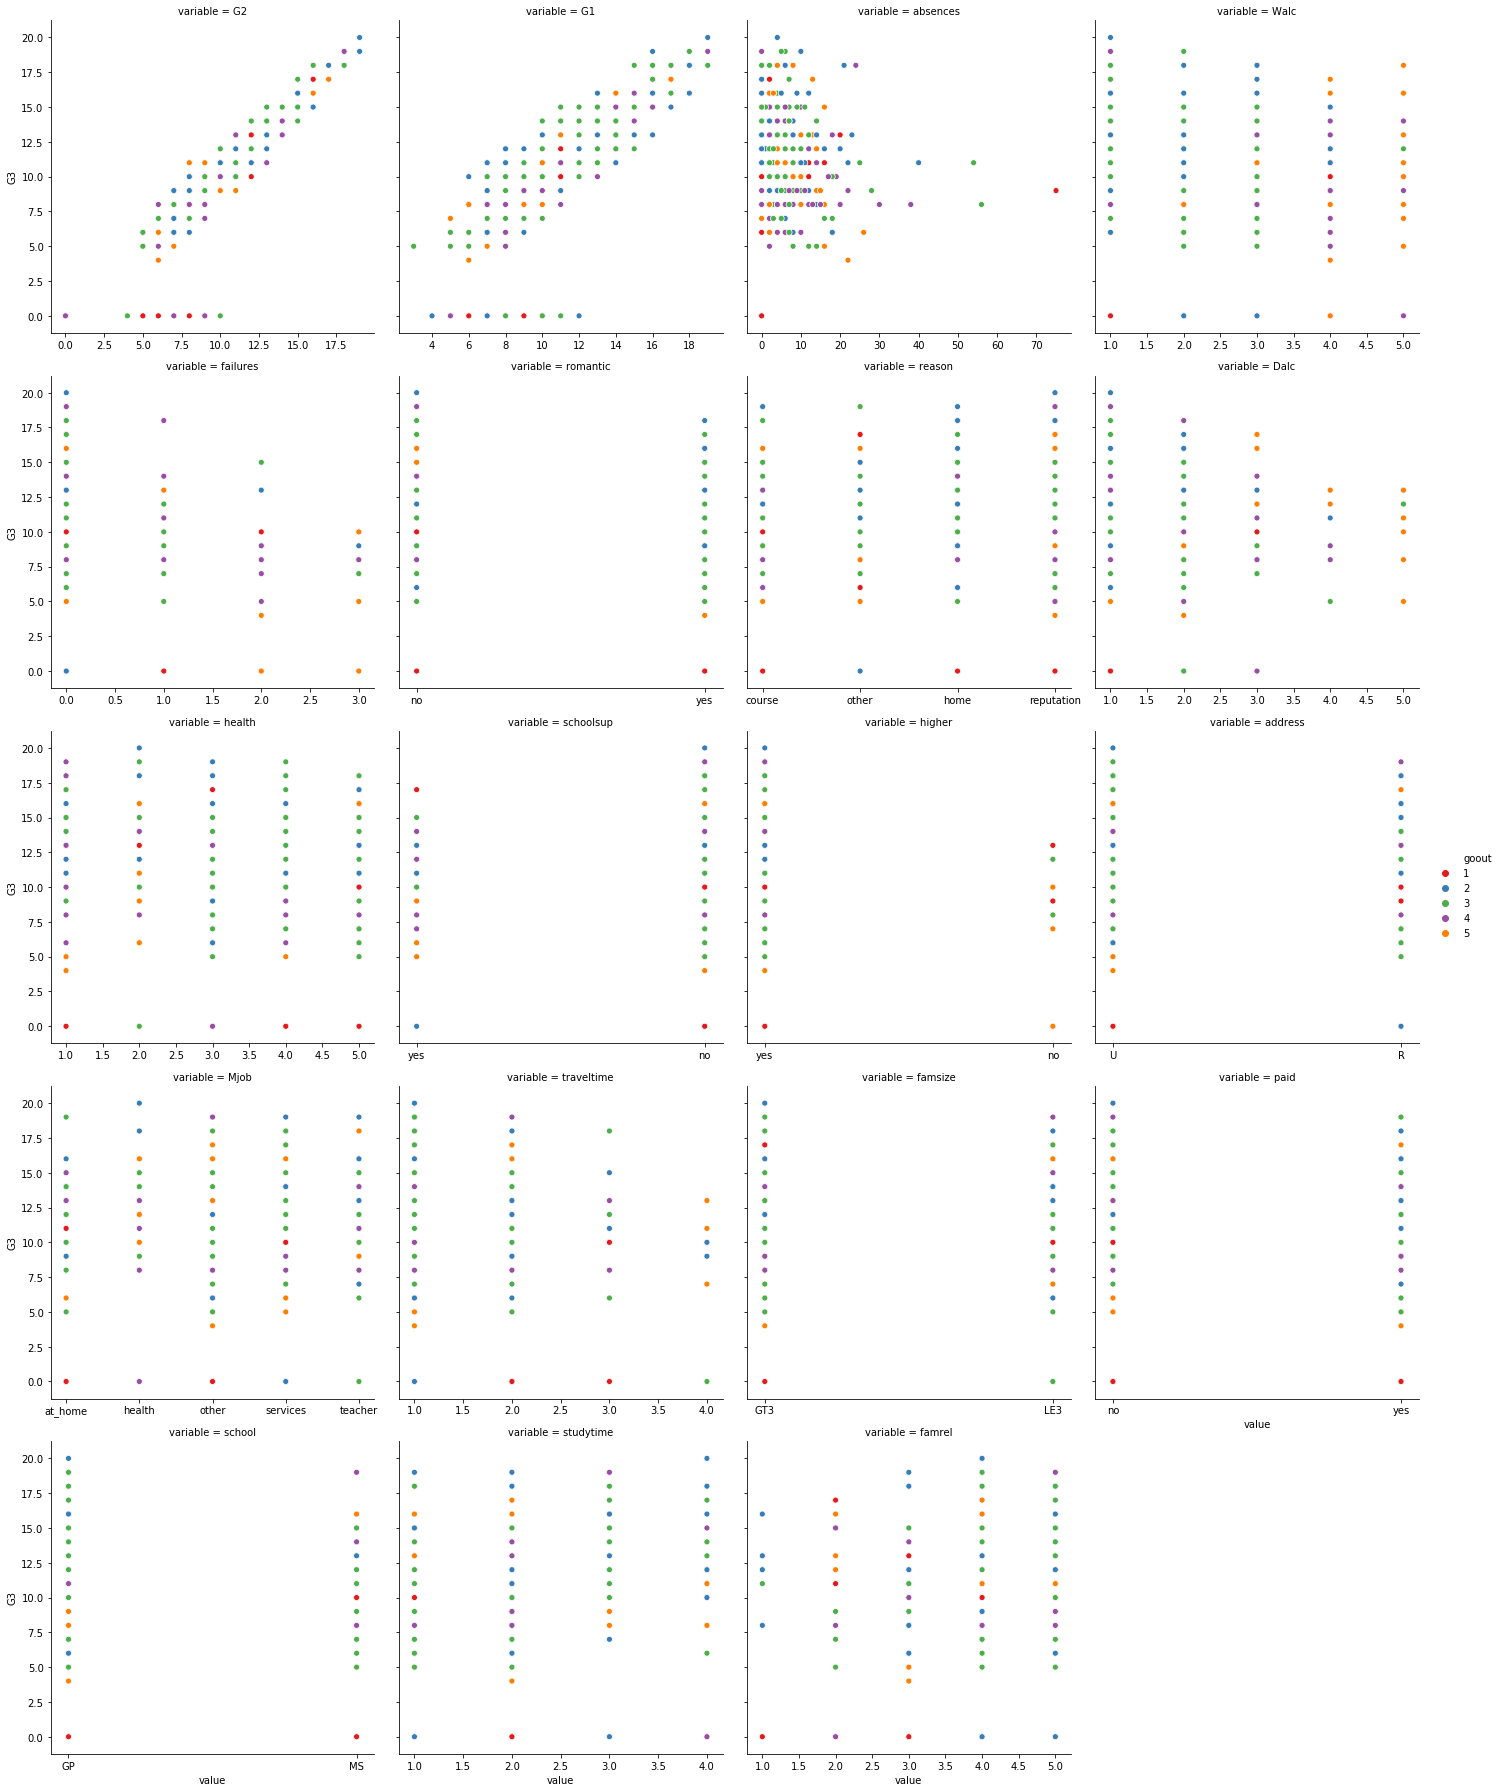

In [39]:
features = ['G2', 'G1', 'absences', 'Walc', 'failures', 'romantic', 'reason',
            'Dalc', 'health', 'schoolsup', 'higher', 'address', 'Mjob', 'traveltime',
            'famsize', 'paid', 'school', 'studytime', 'famrel']
sns.relplot(
    x="value", y="G3", col="variable", col_wrap=4,hue = 'goout', palette = sns.color_palette('Set1', n_colors = 5),
    data=math.melt(id_vars=["G3",'goout'], value_vars=features), facet_kws=dict(sharex=False),
)

Entendendo melhor o comando data.melt;

Se agrupa todos atributos dependentes em uma coluna para se facilitar a plotagem.

In [40]:
math.melt(id_vars=["G3","sex"], value_vars=features)

,G3,sex,variable,value
0,6,F,G2,6
1,6,F,G2,5
2,10,F,G2,8
3,15,F,G2,14
4,10,F,G2,10
...,...,...,...,...
7500,9,M,famrel,5
7501,16,M,famrel,2
7502,7,M,famrel,5
7503,10,M,famrel,4


#### Extra... Fatores relacionados ao consumo de álcool.

Pelos gráficos acima, aparentemente homens consumem mais álcool, assim como os alunos que saem mais.

Obs: Se utilizará o dataset com notas da disciplina português, por ter mais registros.

In [41]:
# Média do nível reportado de álcool ingerido reportado por cada sexo
port[['Walc','sex']].groupby(['sex'])['Walc'].mean()

sex
F    1.937337
M    2.774436
Name: Walc, dtype: float64

In [42]:
# Quantidade de homens e mulheres
port[['Walc','sex']].groupby(['sex'])['Walc'].count()

sex
F    383
M    266
Name: Walc, dtype: int64

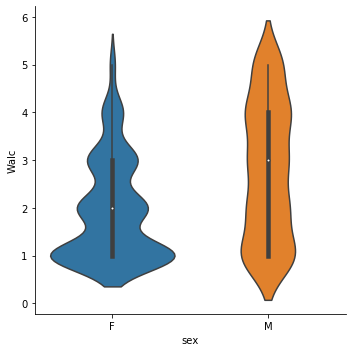

In [43]:
sns.catplot(x="sex", y="Walc", data=port, kind="violin");

Text(0.5, 1.0, 'Números de homens em cada nível de consumo de álcool')

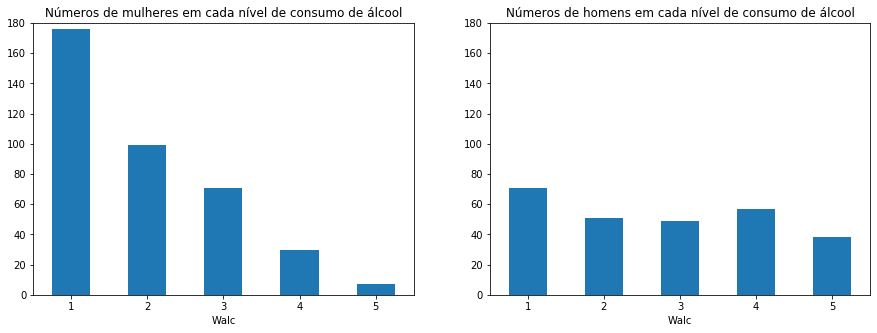

In [44]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
# Plotando a quantidade de alunos de cada sexo por nível de consumo de álcool no FDS
    # Mulheres
port[['Walc','sex']][(port['sex'] == 'F')].groupby(['Walc'])['Walc'].count().plot(kind = 'bar', ax = axs[0])
axs[0].set_xticklabels(labels = ['1','2','3','4','5'], rotation = 0)
axs[0].set_ylim(0,180)
axs[0].set_title('Números de mulheres em cada nível de consumo de álcool')
    # Homens
port[['Walc','sex']][(port['sex'] == 'M')].groupby(['Walc'])['Walc'].count().plot(kind = 'bar', ax = axs[1])
axs[1].set_xticklabels(labels = ['1','2','3','4','5'], rotation = 0)
axs[1].set_ylim(0,180)
axs[1].set_title('Números de homens em cada nível de consumo de álcool')

In [45]:
# Quantas mulheres em cada nível de frequência de saída
x = pd.DataFrame(port[['sex','goout']][(port['sex'] == 'F')].groupby(['goout'])['goout'].count())
# Quantos homens em cada nível de frequência de saída
y = pd.DataFrame(port[['sex','goout']][(port['sex'] == 'M')].groupby(['goout'])['goout'].count())

Text(0.5, 1.0, 'Números de homens em cada nível de frequência de saídas')

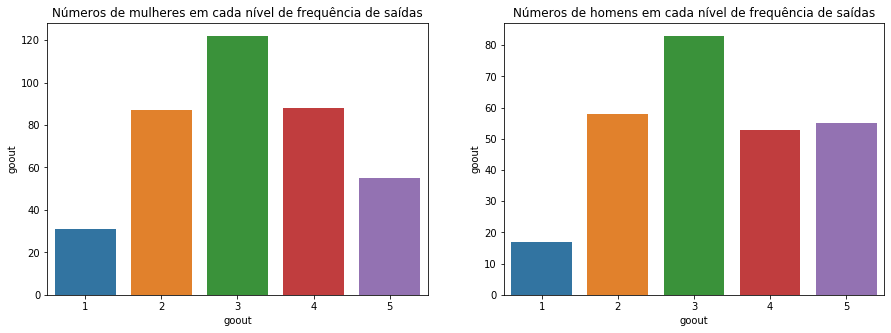

In [46]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
# Saídas das mulheres
sns.barplot(x =x.index, y =x['goout'], ax = axs[0])
axs[0].set_title('Números de mulheres em cada nível de frequência de saídas')

# Saídas dos homens
sns.barplot(x = y.index, y = y['goout'], ax = axs[1])
axs[1].set_title('Números de homens em cada nível de frequência de saídas')

Text(0.5, 1.0, 'Média de saídas de mulheres vs.homens')

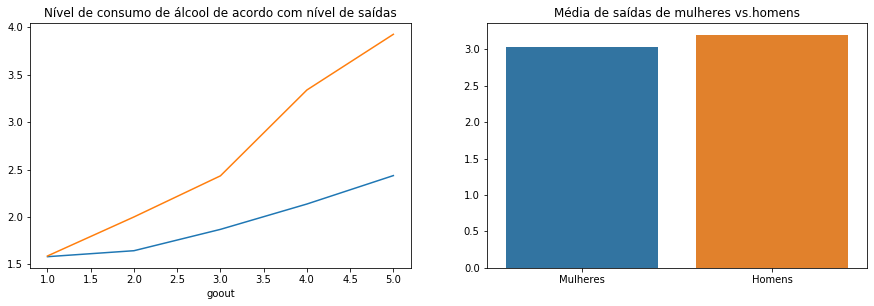

In [47]:
fig, axs = plt.subplots(1,2, figsize=(15, 4.5))
# Relação álcool x saídas
port[['Walc','goout']][port['sex'] == 'F'].groupby(['goout'])['Walc'].mean().plot(kind = 'line', ax = axs[0],
                                                                                 label = 'Mulheres')
port[['Walc','goout']][port['sex'] == 'M'].groupby(['goout'])['Walc'].mean().plot(kind = 'line', ax = axs[0],
                                                                                 label = 'Homens')
axs[0].set_title('Nível de consumo de álcool de acordo com nível de saídas')

# Homens e mulheres saem na mesma proporção?
sns.barplot(x =['Mulheres','Homens'],
            y = [math['goout'][(math['sex'] == 'F')].mean(),math['goout'][(math['sex'] == 'M')].mean()],
            ax = axs[1])
axs[1].set_title('Média de saídas de mulheres vs.homens')                                  

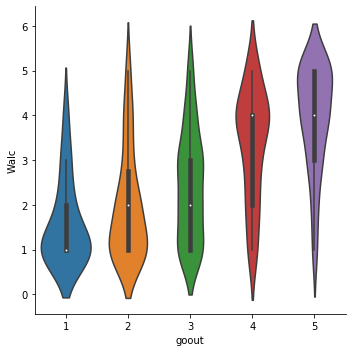

In [48]:
# Diferença no consumo de álcool de acordo com nível de frequência de saídas para homens
sns.catplot(x="goout", y="Walc", data=port[port['sex'] == 'M'], kind="violin");

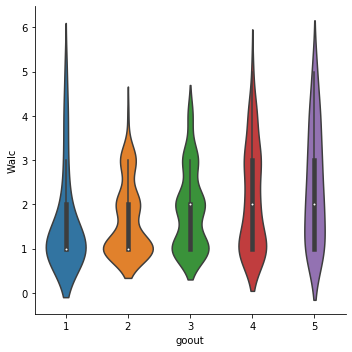

In [49]:
# Diferença no consumo de álcool de acordo com nível de frequência de saídas para mulheres
sns.catplot(x="goout", y="Walc", data=port[port['sex'] == 'F'], kind="violin");

#### Extra 2... Relação entre o nível de escolaridade da mãe e pai do aluno

O mapa de correlações levantado no notebook "Informação mútua e Correlação" mostrou que há uma forte correlação entre o nível de escolaridade do pai e mãe do aluno.

Text(0.5, 1.0, 'Boxplot: Educação do pai vs. Educação da mãe')

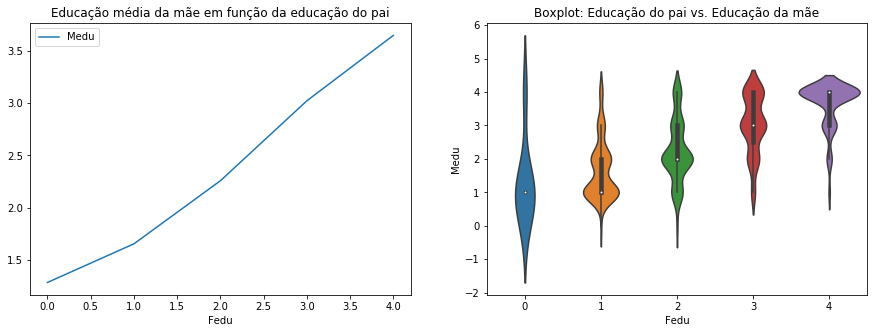

In [50]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
# Gráfico de linha
port[['Fedu','Medu']].groupby('Fedu').mean().plot(kind = 'line', ax = axs[0])
axs[0].set_title('Educação média da mãe em função da educação do pai')
# Boxplot
sns.violinplot(x="Fedu", y="Medu", data=port, ax = axs[1]);
axs[1].set_title('Boxplot: Educação do pai vs. Educação da mãe')

#### Explorarando a diferença de desempenho entre grupos dentro dos atributos

Para a investigação do efeito de grupos binários se utilizará o sns.lmplot, mais o parâmetro hue com o grupo desejado.

Abaixo se avaliará o efeito do sexo do aluno, seu status de relacionamento, tamanho da família, e se cursou escola primária na suas notas de português e matemática (na terceira/última prova).

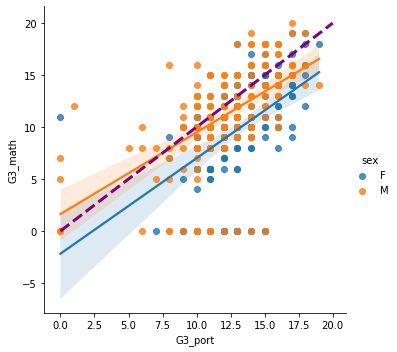

In [93]:
# Efeito do sexo do aluno no desempenho
sns.lmplot(x="G3_port", y="G3_math", hue="sex", data=notas)
# Plotando uma linha representando um desempenho igual nas duas matérias 
plt.plot(range(21), range(21), color='purple', linestyle='dashed', linewidth = 3)

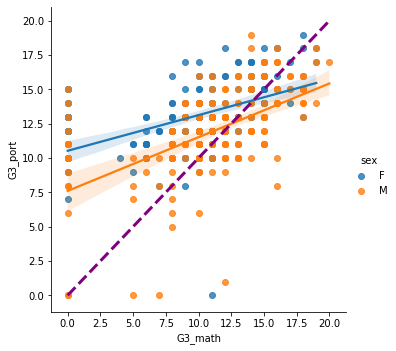

In [95]:
# Efeito do sexo do aluno no desempenho
sns.lmplot(x="G3_math", y="G3_port", hue="sex", data=notas)
# Plotando uma linha representando um desempenho igual nas duas matérias 
plt.plot(range(21), range(21), color='purple', linestyle='dashed', linewidth = 3)

Text(0.5, 1.0, 'Desempenho em português em função do sexo')

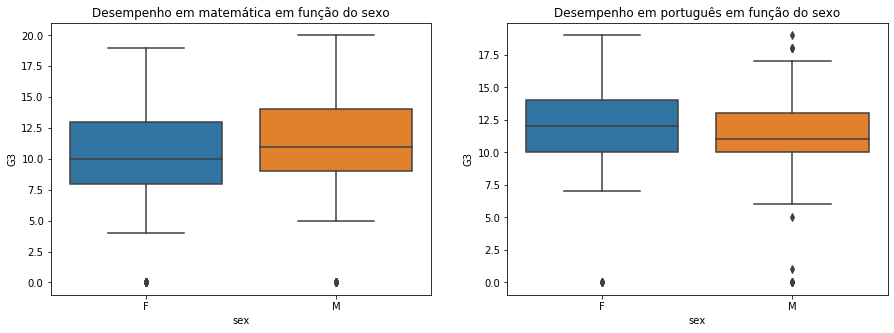

In [96]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(x='sex', y="G3", data=math, ax = axs[0])
axs[0].set_title('Desempenho em matemática em função do sexo')
sns.boxplot(x ='sex', y = 'G3', data = port, ax = axs[1])
axs[1].set_title('Desempenho em português em função do sexo')

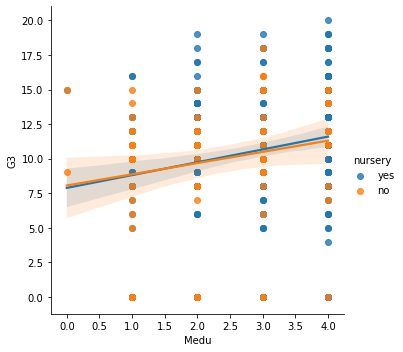

In [80]:
# Efeito do grau da escolaridade da mãe 
# e do aluno ter cursado ou não maternal na sua nota
sns.lmplot(x="Medu", y="G3", hue="nursery", data=math)

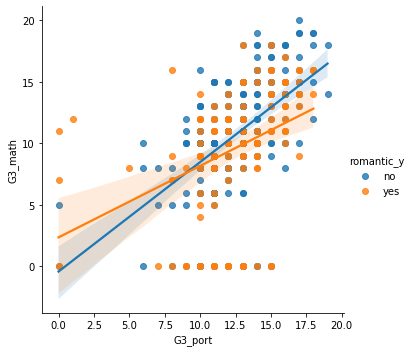

In [52]:
# Efeito do status de relacionamento
sns.lmplot(x="G3_port", y="G3_math", hue="romantic_y", data=notas)

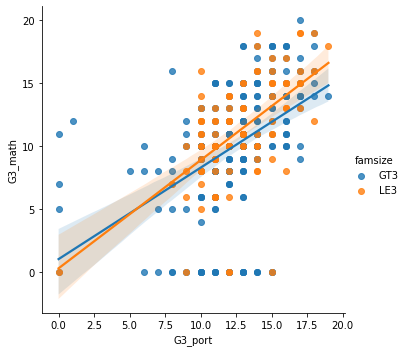

In [53]:
# Efeito do tamanho da família
sns.lmplot(x="G3_port", y="G3_math", hue="famsize", data=notas)

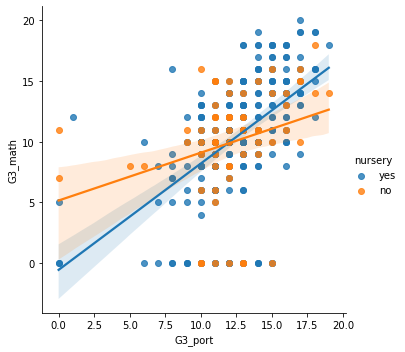

In [54]:
#Efeito do aluno ter cursado ou não escola primária
sns.lmplot(x="G3_port", y="G3_math", hue="nursery", data=notas)

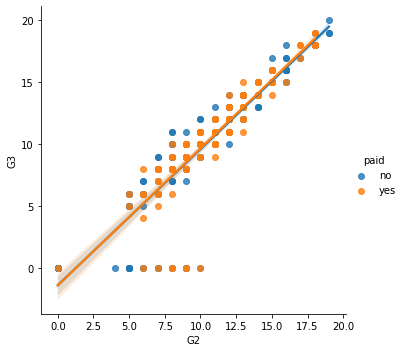

In [55]:
# Efeito do aluno ter feito ou não aulas particulares de matemática
# Obs: como está sendo estudando o efeito do aluno ter feito aula de matemática,
# se utilizará como dataset o que contém apenas as notas de matemática.
sns.lmplot(x="G2", y="G3", hue="paid", data=math)

Para a investigação do efeito de grupos com múltiplos valores também se utilizará também o comando o sns.lmplot com o parâmetro "hue", porém se incluirá também parâmetro "col", para se plotar os dados de cada grupo em colunas diferentes.

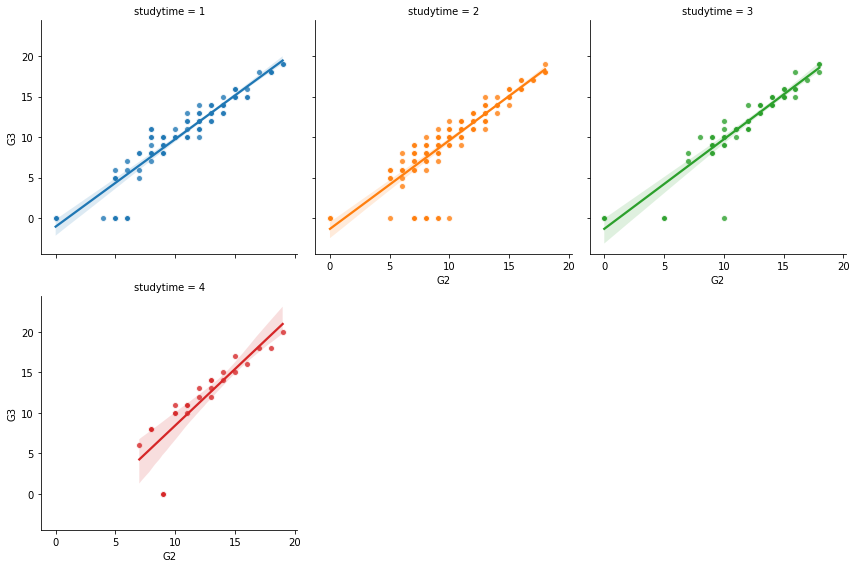

In [56]:
# Efeito do tempo de estudo no desempenho em matemática
sns.lmplot(
    x='G2', y="G3", hue="studytime", col="studytime",
    data=math, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

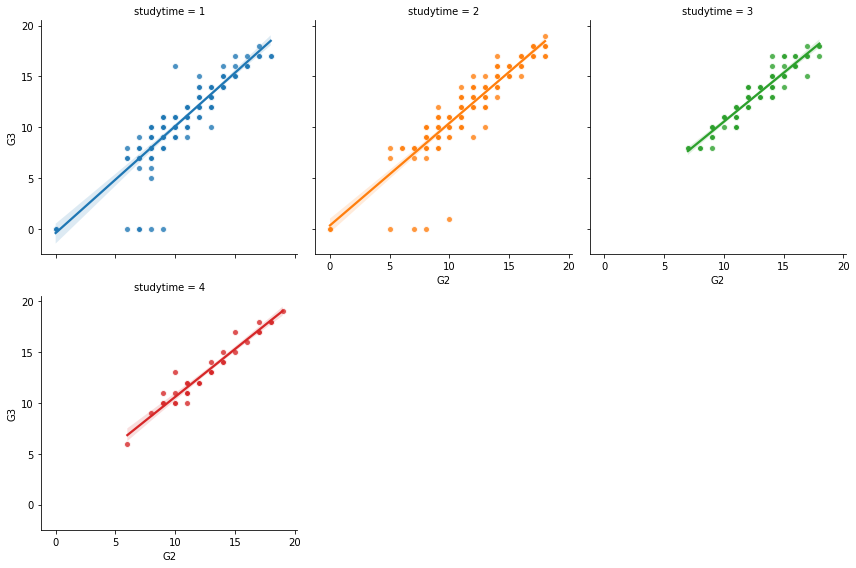

In [57]:
# Efeito do tempo de estudo no desempenho em portugues
port = pd.read_csv('student-por.csv')
sns.lmplot(
    x='G2', y="G3", hue="studytime", col="studytime",
    data=port, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

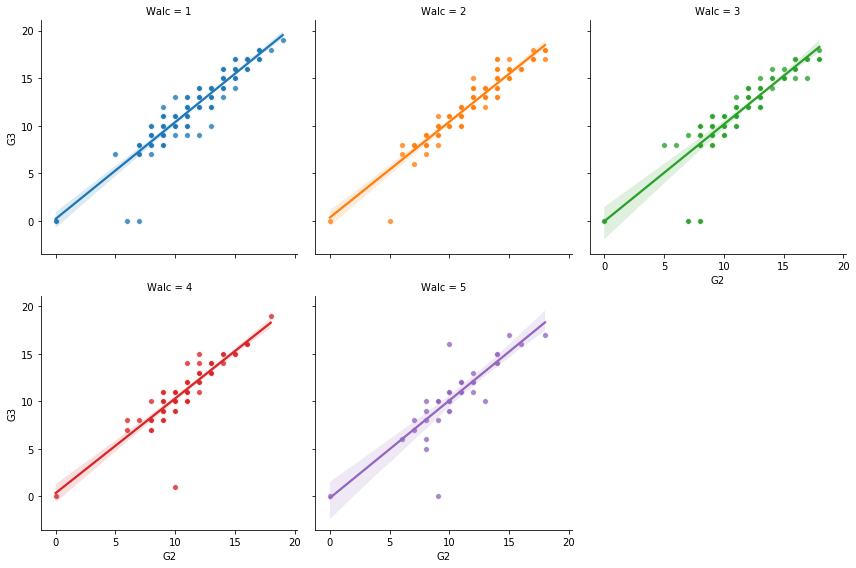

In [104]:
# Efeito da quantidade de álcool ingerida no fim de semana no desempenho em português
sns.lmplot(
    x='G2', y="G3", hue="Walc", col="Walc",
    data=port, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

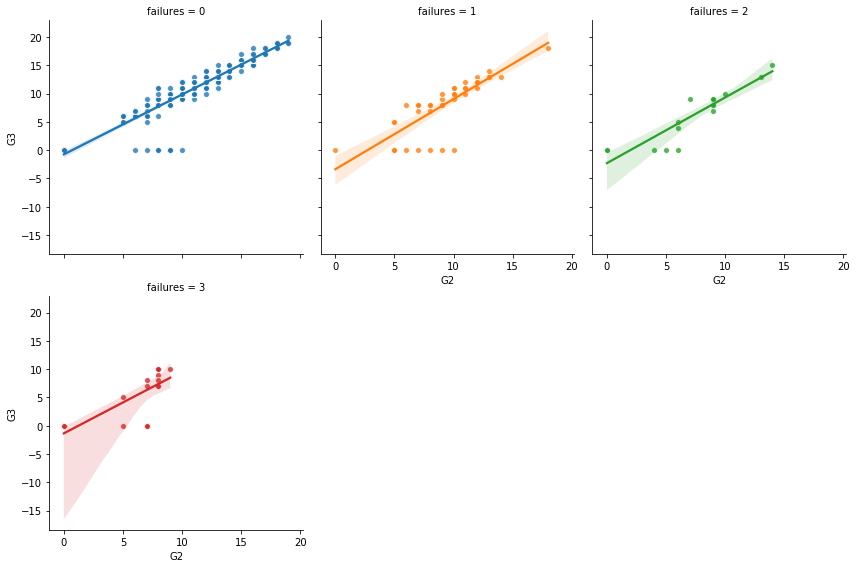

In [59]:
# Efeitos do número de reprovações anteriores em matemática no desempenho em matemática
sns.lmplot(
    x='G2', y="G3", hue="failures", col="failures",
    data=math, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

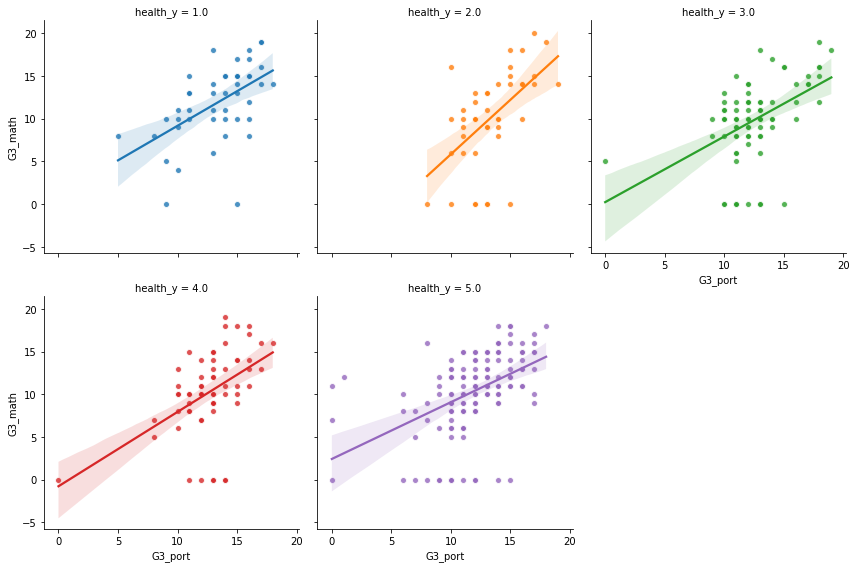

In [60]:
# Efeito da avaliação feita pelo aluno sobre sua saúde no seu desempenho em português e matemática
sns.lmplot(
    x='G3_port', y="G3_math", hue="health_y", col="health_y",
    data=notas, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

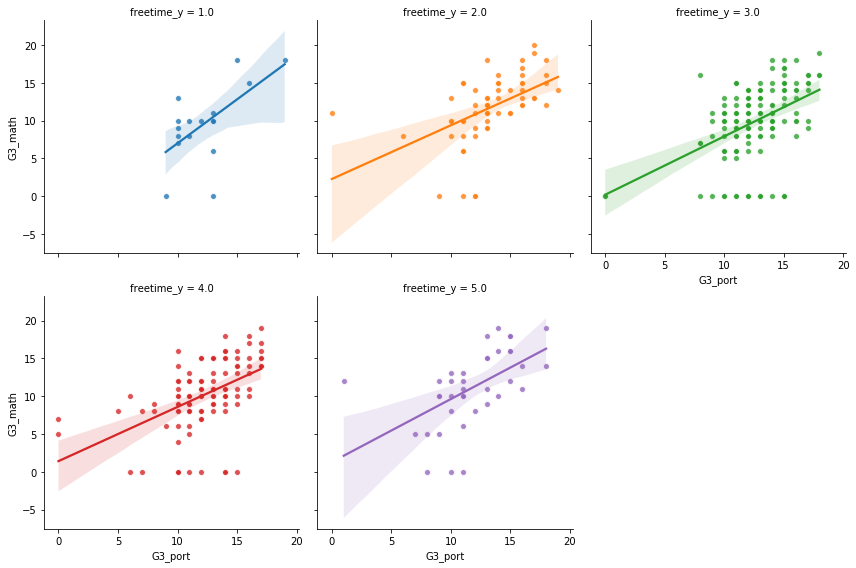

In [61]:
# Efeito da quantidade de tempo livre reportada pelo aluno no seu desempenho em português e matemática
sns.lmplot(
    x='G3_port', y="G3_math", hue="freetime_y", col="freetime_y",
    data=notas, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

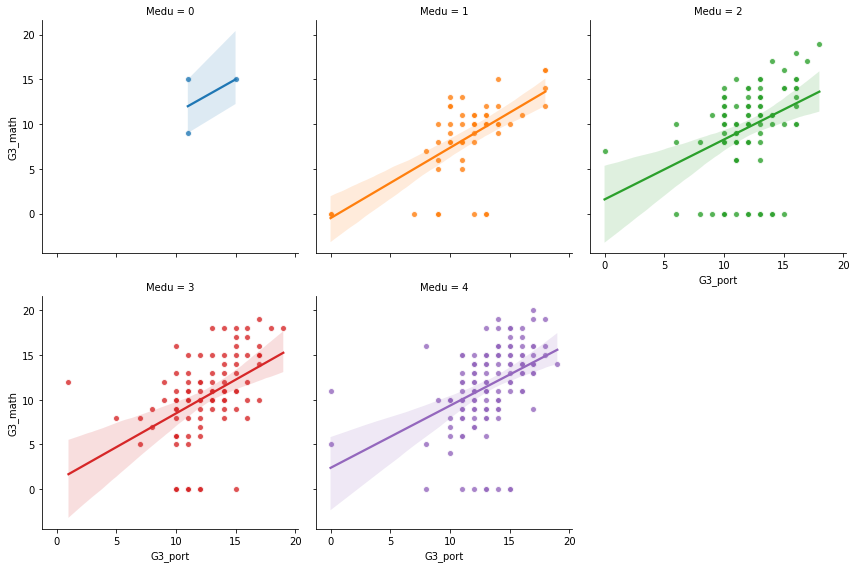

In [62]:
# Efeito do grau de educação da mãe no desempenho do aluno em português e matemática
sns.lmplot(
    x='G3_port', y="G3_math", hue="Medu", col="Medu",
    data=notas, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

#### Explorando o desempenho de diferentes categorias, agora com boxplots, tipo violino

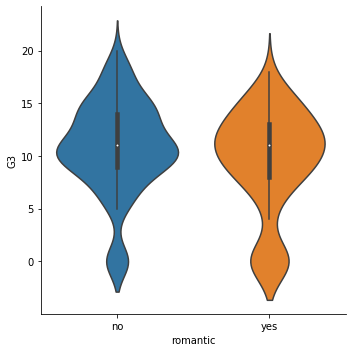

In [63]:
# Efeito do status de relacionamento
sns.catplot(x="romantic", y="G3", data=math, kind="violin");

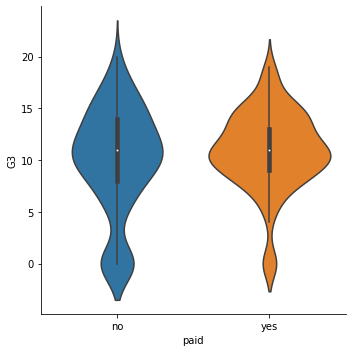

In [64]:
# Efeito de ter feito ou não aula particular da matéria
sns.catplot(x="paid", y="G3", data=math, kind="violin");

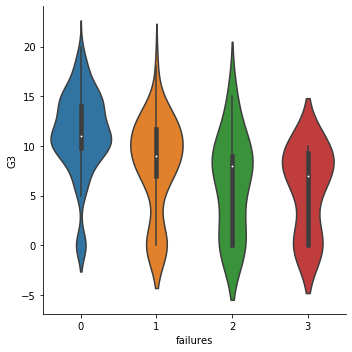

In [65]:
# Efeito da quantidades de vezes que se foi reprovado na matéria anteriormente
sns.catplot(x="failures", y="G3", data=math, kind="violin");

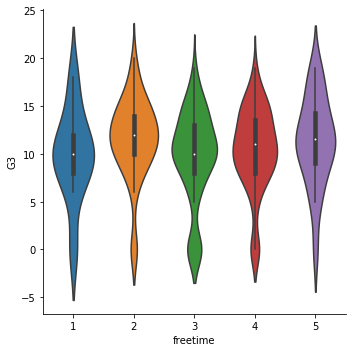

In [66]:
# Efeito da quantidade de tempo livre disponível
sns.catplot(x="freetime", y="G3", data=math, kind="violin");

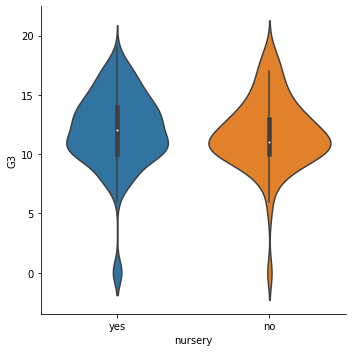

In [67]:
# Efeito de se ter feito escola primária
sns.catplot(x="nursery", y="G3", data=port, kind="violin");

#### Representando o efeito de atributos relacionados

Atributos relacionados à vida acadêmica

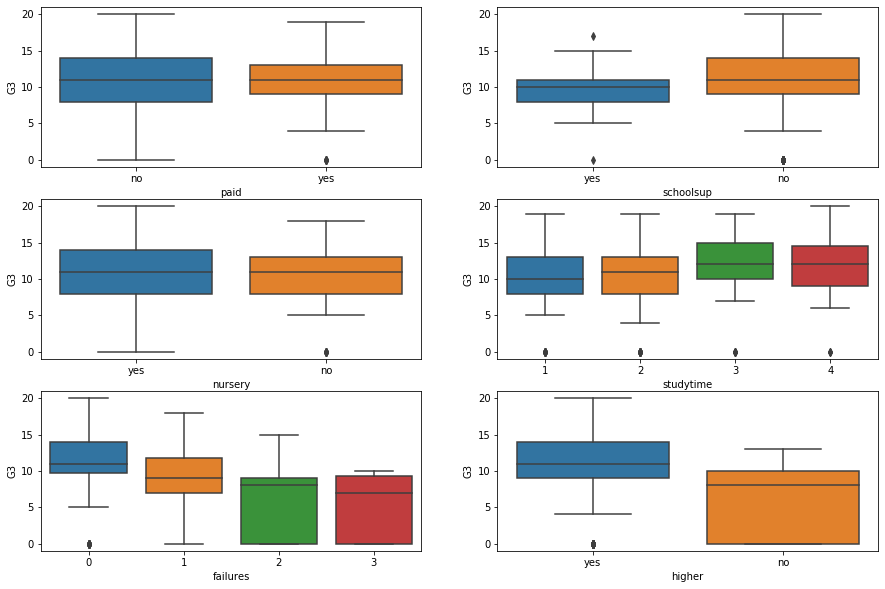

In [106]:
estudo = ['paid','schoolsup','nursery','studytime','failures','higher']
fig, axs = plt.subplots(3, 2, figsize=(15, 10)); indice = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=estudo[indice], y="G3", data=math, ax = axs[i][j])
        indice = indice + 1      

Atributos relacionados à vida familiar

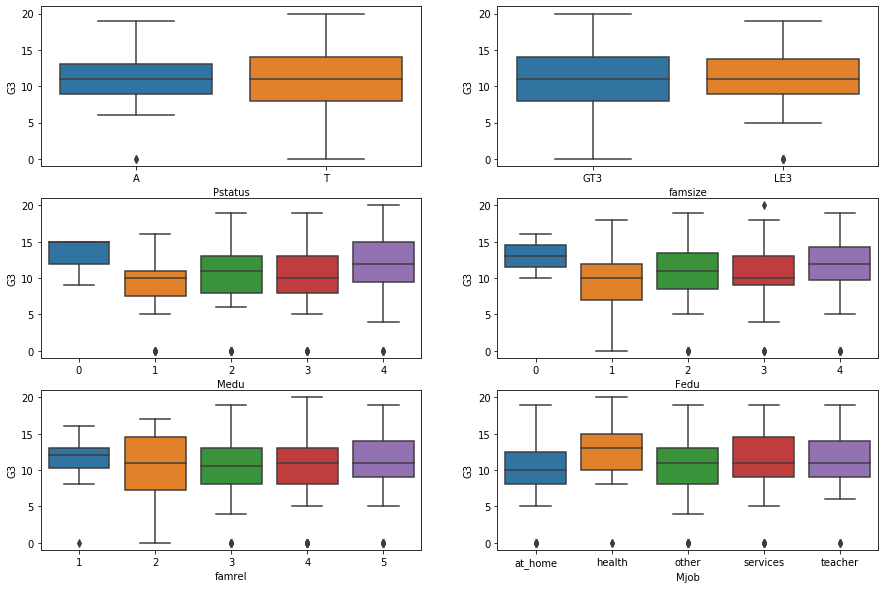

In [107]:
familiares = ['Pstatus','famsize','Medu','Fedu','famrel','Mjob']
fig, axs = plt.subplots(3, 2, figsize=(15, 10));indice = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=familiares[indice], y="G3", data=math, ax = axs[i][j])
        indice = indice + 1

Atributos relacionados à vida social e pessoal

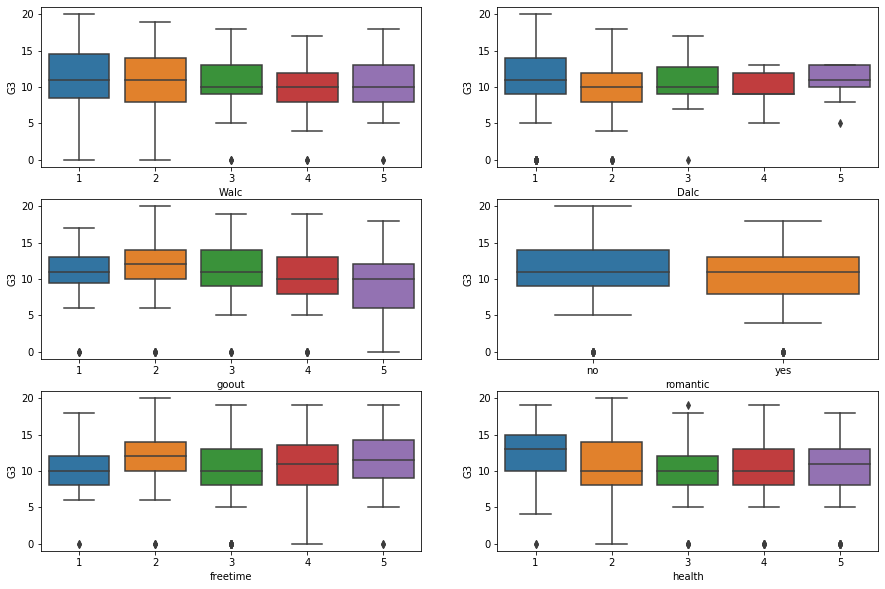

In [70]:
sociais = ['Walc','Dalc','goout','romantic','freetime','health']
fig, axs = plt.subplots(3, 2, figsize=(15, 10)); indice = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=sociais[indice], y="G3", data=math, ax = axs[i][j])
        indice = indice + 1

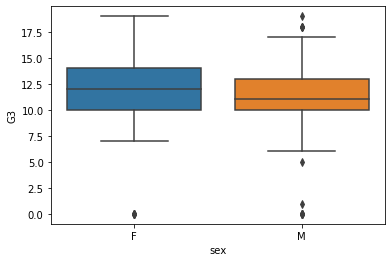

In [82]:
sns.boxplot(x='sex', y="G3", data=port)

#### Fim